Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart Kernel) and then **run all cells** (in the menubar, select Run$\rightarrow$Run All Cells). Alternatively, you can use the **validate** button in the assignment list panel.

Make sure you fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`. When you insert your Code you can remove the line `raise NotImplementedError()`. Also put your name and collaborators below:

In [1]:
import numpy as np

NAME = ""
COLLABORATORS = ""

<div style="background-color:white;" >
<div style="clear: both; display: table;">
  <div style="float: left; width: 14%; padding: 5px; height:auto">
    <img src="img/TUBraunschweig_CO_200vH_300dpi.jpg" alt="TU_Braunschweig" style="width:100%">
  </div>
  <div style="float: left; width: 28%; padding: 5px; height:auto">
    <img src="img/TU_Clausthal_Logo.png" alt="TU_Clausthal" style="width:100%">
  </div>
  <div style="float: left; width: 25%; padding: 5px; height:auto">
    <img src="img/ostfalia.jpg" alt="Ostfalia" style="width:100%">
  </div>
  <div style="float: left; width: 21%; padding: 5px;">
    <img src="img/niedersachsen_rgb_whitebg.png" alt="Niedersachsen" style="width:100%">
  </div>
  <div style="float: left; width: 9%; padding: 5px;">
    <img src="img/internet_BMBF_gefoerdert_2017_en.jpg" alt="bmbf" style="width:100%">
  </div>
</div>
<div style="text-align:center">
<img src="img/ki4all.jpg" alt="KI4ALL-Logo" width="200"/>
</div>
</div>

# Microcredit Artificial Data Generator
**Author:** Max Mustermann, B.Sc.   
**Date:** August 2023   
**Version:** 1  
**Credits:** 1 ECTS  
**License:** [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/)  
**developed by:** [TU Braunschweig](https://www.tu-braunschweig.de/), [Ostfalia Hochschule](https://landing.ostfalia.de/) and [TU Clausthal](https://www.tu-clausthal.de/)  
**sponsored by** [Bundesministerium für Bildung und Forschung](https://www.bmbf.de/bmbf/de/home/home_node.html)  

## Target audience
Students, professionals and the general public who are interested in obtaining a ... (**TODO**)

## Prerequisites
The reader should have a foundational understanding of basic mathematical concepts. Additionally, familiarity with the basics of Python is crucial (see microcredit [Python Introduction](https://git.rz.tu-bs.de/ifn-public/ki4all/python-introduction)) and Python libraries like NumPy and Pandas for data analysis, along with an introductory knowledge of machine learning principles (as outlined in the microcredit [Machine Learning Introduction](https://git.rz.tu-bs.de/ifn-public/ki4all/machine-learning-introduction). It is essential to understand the composition and significance of training data, alongside fundamental statistical concepts such as classification, features (which correspond to data columns), samples (which correspond to data rows), labels (which form the vector indicating the category of each sample), as well as statistical distributions, including the normal and log-normal distributions. Knowledge of effect size and clustering techniques is also vital for data analysis and interpretation. We recommend consulting **[THIS LITERATURE]** for comprehensive coverage of these topics.

Moreover, an understanding of feature engineering, selection, extraction, and the importance of these processes is crucial for the optimization of machine learning models. Additionally, a basic knowledge of biomarkers, the application areas of artificial data, and proficiency in managing data formats such as CSV will significantly benefit practitioners in the field of machine learning and data science.


## Learning goals
After reading this document, the reader should be able to:
* Understand the purpose of synthetic data (benchmarking of machine learning algorithms).
* Understand the structure of synthetic data.
* Be able to generate (needed) data oneself.


## A note to the reader
Explaining at full length some terms and concepts regarding machine learning is beyond
the scope of this document. They will, however, in the majority be explained brieﬂy. The
reader is, however, referred to further textbooks or other material in case a more detailed
understanding is desired.


## 1 Introduction

In order to develop new methods or to compare existing methods for feature selection, reference data with known dependencies and importance of the individual features are needed. This data generator can be used to simulate biological data for example artificial high throughput data including artificial biomarkers. Since commonly not all true biomarkers and internal dependencies of high-dimensional biological datasets are known with certainty, artificial data enables to know the expected outcome in advance. In synthetic data, the feature importances and the distribution of each class are known. Irrelevant features can be purely random or belong to a pseudo-class. Such data can be used, for example, to make random effects observable.


In [2]:
import artificial_data_generator_tools
import warnings
from statsmodels.tools.sm_exceptions import IterationLimitWarning

# suppress warnings
warnings.filterwarnings("ignore", category=IterationLimitWarning)

# 2 Data structure
## 2.1 Different parts of the data set

The synthetic-data-generator produces data sets consisting of up to three main parts:
1. **Relevant features** belonging to an artificial class (for example artificial biomarkers)
2. [optional] **Pseudo-classes** (for example a patient's height or gender, which have no association with a particular disease)
3. [optional] **Random data** representing the features (for example biomarker candidates) that are not associated with any class.
The number of artificial classes is not limited. Each class is generated individually and then combined with the others. In order to simulate artificial biomarkers in total, all individual classes have the same number of features in total.
This is an example of simulated binary biological data including artificial biomarkers:
<div style="text-align:left">
    <img src="img/data_example.png" alt="Data example" width="900"/>
</div>

## 2.2 Data generator parameters
Default values for high dimensional data with few samples (short fat data):
The **number of features** is much larger than the **number of samples**. This is a common problem in bioinformatics and other fields. In this case, the number of features is much larger than the number of samples. This can lead to overfitting and other problems. The artificial data generator can be used to generate data with a large number of features and a small number of samples. This can be used to test feature selection algorithms and other methods for high dimensional data with few samples.


The data generator and its resulting outputs can be manipulated through different parameters. The subsequent section will provide an explanation of each parameter.

**Informative features** are the features that are relevant for the classification. They are potentially relevant to distinguish between the classes. The number of informative features is the number of features that are not random features and not pseudo class features.

One option for an element of the generated data set is a **pseudo-class**. For example, this could be a patient's height or gender, which are not related to a specific disease.

The generated pseudo-class contains the same number of classes with identical distributions as the artificial biomarkers. But after the generation of the individual classes, all samples (rows) are randomly shuffled. Finally, combining the shuffled data with the original, unshuffled class labels, the pseudo-class no longer has a valid association with any class label. Consequently, no element of the pseudo-class should be recognized as relevant by a feature selection algorithm.

Random features are features that are not relevant for the classification. They are used to test feature selection algorithms and other methods for high dimensional data with few samples.



In [3]:
number_of_samples_per_class = 15
number_of_informative_features = 30
number_of_pseudo_class_features = 10
number_of_random_features = 10000
number_of_correlated_features_clusters = 3
number_of_correlated_features_per_cluster = 5

directory_path_to_save_result = "../examples/data/"

## 2.4 Data distribution
For each class, either the **normal distribution or the log normal distribution** can be selected.
The normally distributed data could, for example, represent the range of values of healthy individuals. 

## 2.3 Generate normal distributed class 1 (e.g. healthy individuals)
Scale is a parameter that influences the spread of the distribution. The larger the scale, the larger the spread. We here select the default value of 1, but it can be adjusted to the desired value. Once the desired settings have been adjusted, we can proceed to generate the first entire class. The result and its distribution are displayed in a histogram. Here, the distribution of the first class is shown and the influence of the scale parameter is visible.

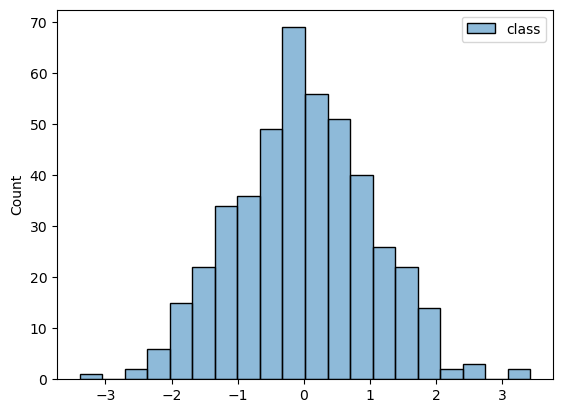

In [4]:
class1_data_array = artificial_data_generator_tools.generate_normal_distributed_informative_features_for_one_class(
    number_of_samples=number_of_samples_per_class,
    number_of_normal_distributed_relevant_features=number_of_informative_features,
    scale=1,
)
# class1_data_array = artificial_data_generator_tools.build_class(class_features_list=[class1_data_array])

# show plot
artificial_data_generator_tools.plot_distribution_of_class_features_for_single_class(class1_data_array)

## 2.6 Generate class 2 (e.g. diseased individuals)
In the case of a disease, biological systems are in some way out of balance. Extreme changes in values as well as outliers can then be observed [Concordet et al., 2009](https://doi.org/10.1016/j.cca.2009.03.057). Therefore, the values of a diseased patients could be simulated with a lognormal distribution. 

The biological system thrown out of balance must react to it. For example, this reaction can then happen in a coordinated manner involving several biomarkers, or corresponding cascades (e.g. pathways) can be activated or blocked. This can result in a **rather stronger correlation of biomarkers in patients suffering from a disease**. To simulate these intra-class correlations, a class can contain feature clusters with high internal correlation. The respective strength can be adjusted by defining upper and lower bound of the desired correlation. Only positive correlations can be calculated. These clusters are generated in the following cells. TODO: Reasonable values for the number of correlated features per cluster and the number of clusters should be defined.

generation of correlation matrix ...
generation of covariant matrix ...
min absolute correlation: 0.9107142857142857


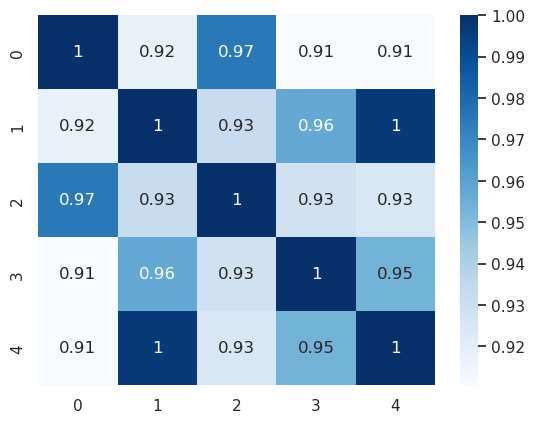

In [5]:
correlated_cluster_1 = artificial_data_generator_tools.generate_correlated_cluster(
    number_of_features=5,
    number_of_samples=number_of_samples_per_class,
    upper_bound=1,
    lower_bound=0.9,
)
artificial_data_generator_tools.plot_correlated_cluster(correlated_cluster_1)

generation of correlation matrix ...
generation of covariant matrix ...
min absolute correlation: 0.7464285714285714


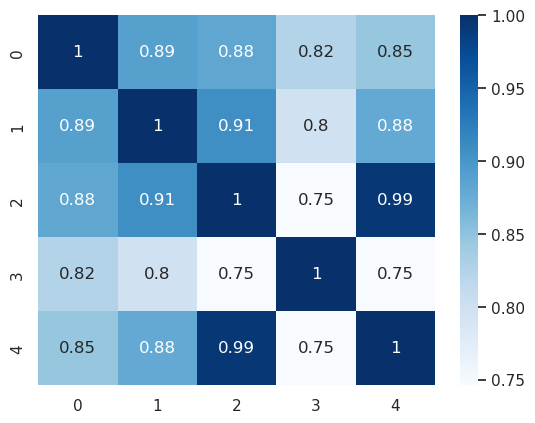

In [6]:
correlated_cluster_2 = artificial_data_generator_tools.generate_correlated_cluster(
    number_of_features=5,
    number_of_samples=number_of_samples_per_class,
    upper_bound=1,
    lower_bound=0.9,
)
artificial_data_generator_tools.plot_correlated_cluster(correlated_cluster_2)

generation of correlation matrix ...
generation of covariant matrix ...
min absolute correlation: 0.8892857142857142


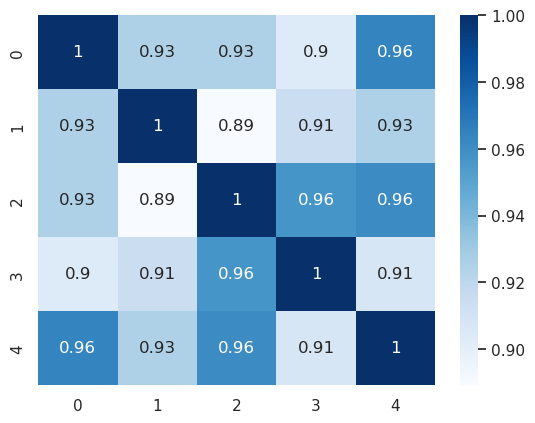

In [7]:
correlated_cluster_3 = artificial_data_generator_tools.generate_correlated_cluster(
    number_of_features=5,
    number_of_samples=number_of_samples_per_class,
    upper_bound=1,
    lower_bound=0.9,
)
artificial_data_generator_tools.plot_correlated_cluster(correlated_cluster_3)

## Plot the correlation matrix of the generated clusters

min absolute correlation: 0.0035714285714285713


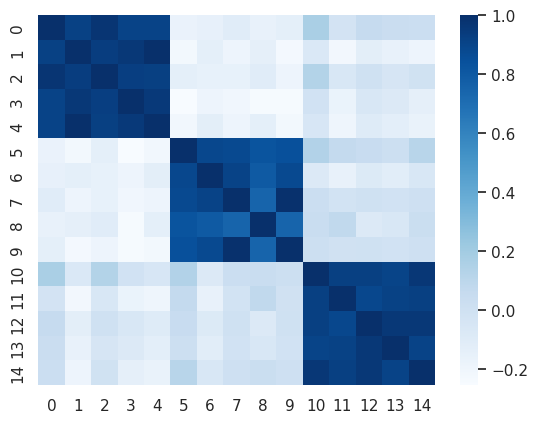

In [8]:
# concatenate the cluster arrays
correlated_clusters = np.concatenate([correlated_cluster_1, correlated_cluster_2, correlated_cluster_3], axis=1)
# plot the correlation matrix
artificial_data_generator_tools.plot_correlated_cluster(correlated_clusters, show_values=False)

## 2.7 Combine the correlated clusters together with uncorrelated features to one class

/home/sigrun/PycharmProjects/artificial-data-generator/artificial_data_generator/artificial_data_generator_tools.py:128: UserWarning: mean of generated data -0.18843322393199557 differs from expected mean 0 -> Try choosing a smaller scale for a small sample size or accept a deviating mean. The current scale is 2.
  warnings.warn(


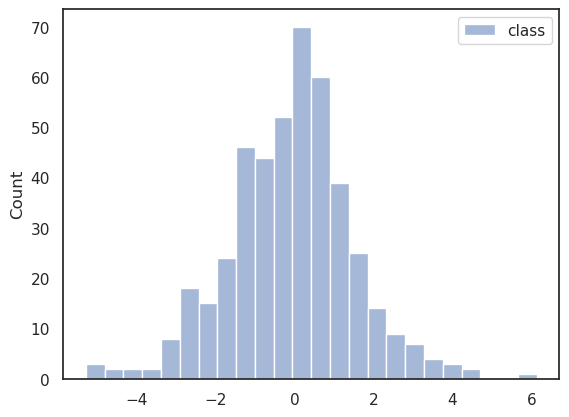

In [9]:
class2_data_array = artificial_data_generator_tools.generate_normal_distributed_informative_features_for_one_class(
    number_of_samples=number_of_samples_per_class,
    number_of_normal_distributed_relevant_features=number_of_informative_features - correlated_clusters.shape[1],
    scale=2,
)
class2_data_array = artificial_data_generator_tools.build_class(
    class_features_list=[correlated_clusters, class2_data_array]
)

# show plot
artificial_data_generator_tools.plot_distribution_of_class_features_for_single_class(class2_data_array)


## 2.5 Transform the normal distributed class 2 features to log-normal distribution to simulate outliers/ skewed data which can be observed in diseased individuals

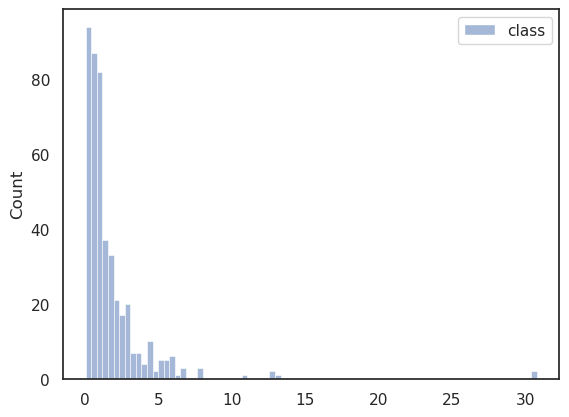

In [10]:
log_normal_distributed_class2_data_array = (
    artificial_data_generator_tools.transform_normal_distributed_class_features_to_lognormal_distribution(
        class_features_data_array=class1_data_array
    )
)
assert log_normal_distributed_class2_data_array.shape[1] == number_of_informative_features

# show plot
artificial_data_generator_tools.plot_distribution_of_class_features_for_single_class(
    log_normal_distributed_class2_data_array,
)

## 2.7 Show plot distribution of all classes
After the basic generation of the classes, the following diagram shows the distribution of the first class and the distribution of the second class after the transformation into a lognormal distribution. However, the generated classes may not yet be differentiable based on the distribution of the features, as the effect size can still be very small or non-existent. The desired effect size can be defined in the next step.

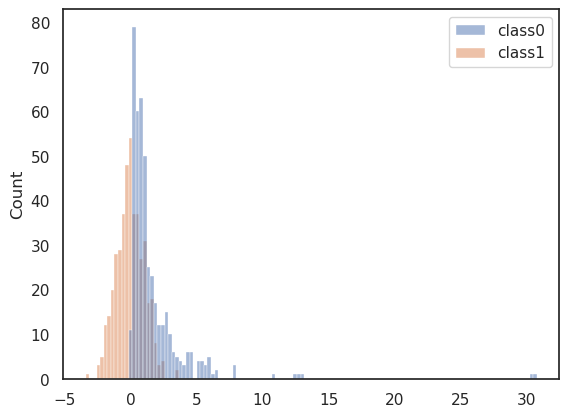

In [11]:
artificial_data_generator_tools.plot_distributions_of_all_classes(
    [log_normal_distributed_class2_data_array, class1_data_array]
)

## 2.8 Effect size
The different **classes can be shifted** to regulate the effect sizes and to influence the difficulty of data analysis.
Effect size is a statistical concept that measures the strength of the relationship between two variables in a study. Unlike significance tests, which tell us if a relationship exists, effect size tells us how strong that relationship is. It helps us understand the practical importance of research results beyond mere statistical significance. For example, a large effect size means a substantial relationship or difference between groups, whereas a small effect size indicates a minor relationship. 
To better understand this, here is an exemplary graphical representation of the effect size and its impact.

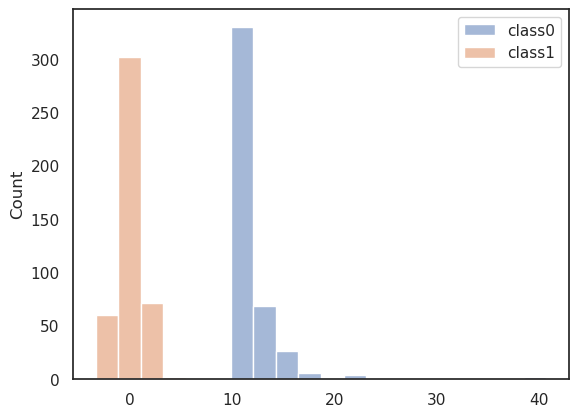

In [12]:
# large effect size separating the classes perfectly
artificial_data_generator_tools.plot_distributions_of_all_classes(
    [
        artificial_data_generator_tools.shift_class_to_enlarge_effectsize(
            log_normal_distributed_class2_data_array, effect_size=10
        ),
        class1_data_array,
    ]
)

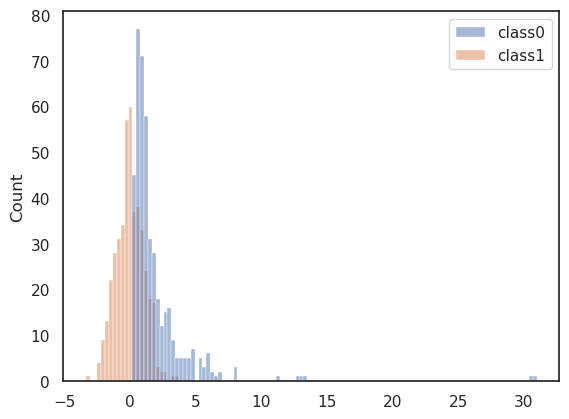

In [13]:
# tiny effect size with overlapping distributions
artificial_data_generator_tools.plot_distributions_of_all_classes(
    [
        artificial_data_generator_tools.shift_class_to_enlarge_effectsize(
            log_normal_distributed_class2_data_array, effect_size=0.2
        ),
        class1_data_array,
    ]
)

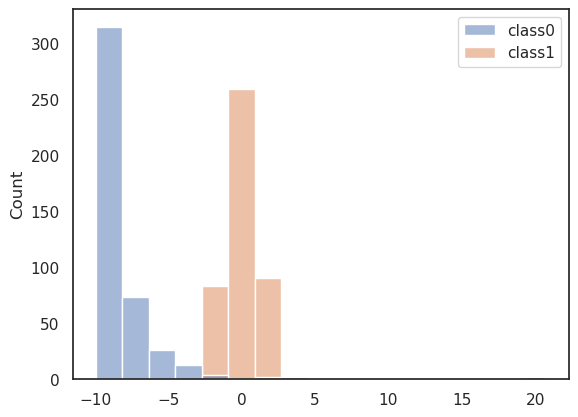

In [14]:
# negative effect size
artificial_data_generator_tools.plot_distributions_of_all_classes(
    [
        artificial_data_generator_tools.shift_class_to_enlarge_effectsize(
            log_normal_distributed_class2_data_array, effect_size=-10
        ),
        class1_data_array,
    ]
)

## 2.9 Shift Class to enlarge effect size
In the next step, the effect size is increased by shifting the class. The result is again visible in the plot. To see the effect, compare the plot with the one from Section 1.7. -> TODO: Auslagern der Erklärung der Effektgröße und hier darauf verweisen?

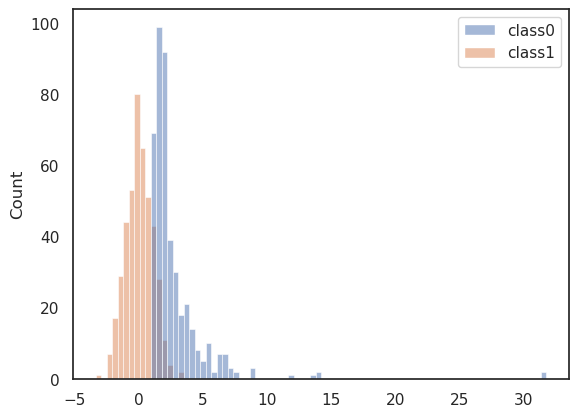

In [15]:
shifted_class2_data_array = artificial_data_generator_tools.shift_class_to_enlarge_effectsize(
    log_normal_distributed_class2_data_array, effect_size=1
)
# show plot
artificial_data_generator_tools.plot_distributions_of_all_classes([shifted_class2_data_array, class1_data_array])

# 3 Pseudo-classes
One option for an element of the generated data set is a pseudo-class. For example, this could be a patient's height or gender, which are not related to a specific disease.
The generated pseudo-class contains the same number of classes with identical distributions as the artificial biomarkers. But after the generation of the individual classes, all samples (rows) are randomly shuffled. Finally, combining the shuffled data with the original, unshuffled class labels, the pseudo-class no longer has a valid association with any class label. Consequently, no element of the pseudo-class should be recognized as relevant by a feature selection algorithm.


# 4 Random features
The artificial biomarkers and, if applicable, the optional pseudo-classes can be combined with any number of random features. Varying the number of random features can be used, for example, to analyze random effects that occur in small sample sizes with a very large number of features.

# 5 Generate artificial classification data
The individual parts of the data are combined to form the complete data set. The dataset consists of the following parts and in the following order:
- class labels
- informative features
- pseudo class features
- random features

In [16]:
artificial_data_df = artificial_data_generator_tools.generate_artificial_classification_data(
    generated_classes_list=[shifted_class2_data_array, class1_data_array],
    number_of_samples_per_class=number_of_samples_per_class,
    number_of_random_features=number_of_random_features,
    number_of_pseudo_class_features=number_of_pseudo_class_features,
    number_of_pseudo_classes=2,
)
assert (
    artificial_data_df.shape[1]
    == number_of_informative_features + number_of_pseudo_class_features + number_of_random_features + 1
)  # label column
print("The complete data set has the following shape:")
print(f"number of samples: {artificial_data_df.shape[0]}")
print(f"number of features: {artificial_data_df.shape[1]}")

The complete data set has the following shape:
number of samples: 30
number of features: 10041


# 6 Save CSV
In the final step, the data can be downloaded in CSV format and are ready for further analysis and processing.

In [17]:
artificial_data_df.to_csv(f"{directory_path_to_save_result}data_i{number_of_informative_features}.csv", index=False)